In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
train_claim=pd.read_csv("/content/Train_Claim.csv",na_values=['?','-5','MISSINGVALUE','MISSEDDATA','NA','-1','MISSINGVAL','???',])
train_claim.head()

,CustomerID,DateOfIncident,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentCity,IncidentAddress,IncidentTime,NumberOfVehicles,PropertyDamage,BodilyInjuries,Witnesses,PoliceReport,AmountOfTotalClaim,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage
0,Cust10000,2015-02-03,Multi-vehicle Collision,Side Collision,Total Loss,Police,State7,City1,Location 1311,17.0,3,NaN,1,0.0,NaN,65501.0,13417,6071,46013
1,Cust10001,2015-02-02,Multi-vehicle Collision,Side Collision,Total Loss,Police,State7,City5,Location 1311,10.0,3,YES,2,1.0,YES,61382.0,15560,5919,39903
2,Cust10002,2015-01-15,Single Vehicle Collision,Side Collision,Minor Damage,Other,State8,City6,Location 2081,22.0,1,YES,2,3.0,NO,66755.0,11630,11630,43495
3,Cust10003,2015-01-19,Single Vehicle Collision,Side Collision,Minor Damage,Other,State9,City6,Location 2081,22.0,1,YES,2,3.0,NO,66243.0,12003,12003,42237
4,Cust10004,2015-01-09,Single Vehicle Collision,Rear Collision,Minor Damage,Fire,State8,City6,Location 1695,10.0,1,NO,2,1.0,YES,53544.0,8829,7234,37481


In [3]:
train_claim.dtypes

CustomerID                object
DateOfIncident            object
TypeOfIncident            object
TypeOfCollission          object
SeverityOfIncident        object
AuthoritiesContacted      object
IncidentState             object
IncidentCity              object
IncidentAddress           object
IncidentTime             float64
NumberOfVehicles           int64
PropertyDamage            object
BodilyInjuries             int64
Witnesses                float64
PoliceReport              object
AmountOfTotalClaim       float64
AmountOfInjuryClaim        int64
AmountOfPropertyClaim      int64
AmountOfVehicleDamage      int64
dtype: object

In [4]:
train_demo=pd.read_csv("/content/Train_Demographics.csv")
train_demo.head()

,CustomerID,InsuredAge,InsuredZipCode,InsuredGender,InsuredEducationLevel,InsuredOccupation,InsuredHobbies,CapitalGains,CapitalLoss,Country
0,Cust10000,35,454776,MALE,JD,armed-forces,movies,56700,-48500,India
1,Cust10001,36,454776,MALE,JD,tech-support,cross-fit,70600,-48500,India
2,Cust10002,33,603260,MALE,JD,armed-forces,polo,66400,-63700,India
3,Cust10003,36,474848,MALE,JD,armed-forces,polo,47900,-73400,India
4,Cust10004,29,457942,FEMALE,High School,exec-managerial,dancing,0,-41500,India


In [5]:
train1=pd.merge(train_claim,train_demo)
train1.shape

(28836, 28)

In [6]:
train_policy=pd.read_csv("/content/Train_Policy.csv")
train_policy.head()

,InsurancePolicyNumber,CustomerLoyaltyPeriod,DateOfPolicyCoverage,InsurancePolicyState,Policy_CombinedSingleLimit,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,InsuredRelationship,CustomerID
0,110122,328,2014-10-17,State3,250/500,1000,1406.91,0,husband,Cust1001
1,110125,256,1990-05-25,State1,250/500,2000,1415.74,6000000,unmarried,Cust1004
2,110126,228,2014-06-06,State1,500/1000,1000,1583.91,6000000,unmarried,Cust1005
3,110127,256,2006-10-12,State3,250/500,1000,1351.10,0,unmarried,Cust1006
4,110128,137,2000-06-04,State2,250/500,1000,1333.35,0,husband,Cust1007


In [7]:
train2=pd.merge(train1,train_policy)
train2.shape

(28836, 37)

In [8]:
train_vehicle=pd.read_csv("/content/Train_Vehicle.csv")
train_vehicle.tail()

,CustomerID,VehicleAttribute,VehicleAttributeDetails
115339,Cust22134,VehicleMake,Audi
115340,Cust25338,VehicleID,Vehicle28831
115341,Cust7637,VehicleID,Vehicle12870
115342,Cust33581,VehicleID,Vehicle19680
115343,Cust14156,VehicleModel,Corolla


In [9]:
train_vehicle['VehicleAttribute'].describe()

count        115344
unique            4
top       VehicleID
freq          28836
Name: VehicleAttribute, dtype: object

In [10]:
train_vehicle["VehicleAttribute"].value_counts()

VehicleID       28836
VehicleModel    28836
VehicleMake     28836
VehicleYOM      28836
Name: VehicleAttribute, dtype: int64

In [11]:
def shape(x):
  return x["CustomerID"].shape

In [12]:
print("train_vehicle",shape(train_vehicle))
print("train_policy",shape(train_policy))
print("train_claim",shape(train_claim))
print("train_demo",shape(train_demo))

train_vehicle (115344,)
train_policy (28836,)
train_claim (28836,)
train_demo (28836,)


In [13]:
def func(x):
  return x["CustomerID"].nunique()


In [14]:
def count(x):
  return x["CustomerID"].nunique()

In [15]:
print("train_vehicle",count(train_vehicle))
print("train_policy",count(train_policy))
print("train_claim",count(train_claim))
print("train_demo",count(train_demo))

train_vehicle 28836
train_policy 28836
train_claim 28836
train_demo 28836


In [16]:
print("train_vehicle",func(train_vehicle))
print("train_policy",func(train_policy))
print("train_claim",func(train_claim))
print("train_demo",func(train_demo))

train_vehicle 28836
train_policy 28836
train_claim 28836
train_demo 28836


In [17]:
# variable to hold the count
cnt = 0
  
# list to hold visited values
visited = []
  
# loop for counting the unique
# values in height
for i in range(0, len(train_policy['CustomerID'])):
    
    if train_policy['CustomerID'][i] not in visited: 
        
        visited.append(train_policy['CustomerID'][i])
          
        cnt += 1
  
print("No.of.unique values :",
      cnt)
  
print("unique values :",
      visited)

No.of.unique values : 28836
unique values : ['Cust1001', 'Cust1004', 'Cust1005', 'Cust1006', 'Cust1007', 'Cust1009', 'Cust1010', 'Cust1011', 'Cust1012', 'Cust1013', 'Cust1014', 'Cust1015', 'Cust1017', 'Cust1018', 'Cust1021', 'Cust1022', 'Cust1023', 'Cust1024', 'Cust1025', 'Cust1026', 'Cust1027', 'Cust1028', 'Cust1031', 'Cust1033', 'Cust1034', 'Cust1035', 'Cust1036', 'Cust1037', 'Cust1038', 'Cust1039', 'Cust1040', 'Cust1041', 'Cust1042', 'Cust1043', 'Cust1044', 'Cust1046', 'Cust1047', 'Cust1048', 'Cust1049', 'Cust1050', 'Cust1051', 'Cust1053', 'Cust1054', 'Cust1055', 'Cust1057', 'Cust1058', 'Cust1059', 'Cust1060', 'Cust1061', 'Cust1062', 'Cust1064', 'Cust1065', 'Cust1066', 'Cust1067', 'Cust1068', 'Cust1069', 'Cust1070', 'Cust1071', 'Cust1072', 'Cust1075', 'Cust1076', 'Cust1078', 'Cust1079', 'Cust1080', 'Cust1081', 'Cust1083', 'Cust1085', 'Cust1086', 'Cust1088', 'Cust1089', 'Cust1090', 'Cust1091', 'Cust1092', 'Cust1093', 'Cust1094', 'Cust1095', 'Cust1096', 'Cust1098', 'Cust1099', 'Cust11

trainvehicle

In [18]:
train_vehicle["VehicleAttribute"].describe()

count        115344
unique            4
top       VehicleID
freq          28836
Name: VehicleAttribute, dtype: object

In [19]:
train_vehicle["VehicleAttribute"].value_counts()

VehicleID       28836
VehicleModel    28836
VehicleMake     28836
VehicleYOM      28836
Name: VehicleAttribute, dtype: int64

In [20]:
vehicle_id= train_vehicle.query('VehicleAttribute=="VehicleID"')
vehicle_Model= train_vehicle.query('VehicleAttribute=="VehicleModel"')
vehicle_Make= train_vehicle.query('VehicleAttribute=="VehicleMake"')
vehicle_YOM= train_vehicle.query('VehicleAttribute=="VehicleYOM"')

In [21]:
vehicle_Model.head()

,CustomerID,VehicleAttribute,VehicleAttributeDetails
1,Cust21384,VehicleModel,Malibu
3,Cust27118,VehicleModel,Neon
6,Cust30237,VehicleModel,RAM
27,Cust23684,VehicleModel,Neon
33,Cust35737,VehicleModel,Wrangler


In [22]:
vehicle_id= vehicle_id.rename(columns={'VehicleAttributeDetails': 'vehicle_id'})
vehicle_Make= vehicle_Make.rename(columns={'VehicleAttributeDetails': 'vehicle_Make'})
vehicle_YOM= vehicle_YOM.rename(columns={'VehicleAttributeDetails': 'vehicle_YOM'})
vehicle_Model= vehicle_Model.rename(columns={'VehicleAttributeDetails': 'vehicle_Model'})


In [23]:

vehicle_Make.head()

,CustomerID,VehicleAttribute,vehicle_Make
2,Cust33335,VehicleMake,Toyota
9,Cust20624,VehicleMake,Chevrolet
13,Cust9006,VehicleMake,Accura
15,Cust18447,VehicleMake,Honda
20,Cust17021,VehicleMake,BMW


In [24]:

vehicle_YOM.head()

,CustomerID,VehicleAttribute,vehicle_YOM
7,Cust21334,VehicleYOM,1996
8,Cust26634,VehicleYOM,1999
11,Cust21432,VehicleYOM,2002
12,Cust22845,VehicleYOM,2000
14,Cust30659,VehicleYOM,2003


In [25]:
vehicle_Model.head()

,CustomerID,VehicleAttribute,vehicle_Model
1,Cust21384,VehicleModel,Malibu
3,Cust27118,VehicleModel,Neon
6,Cust30237,VehicleModel,RAM
27,Cust23684,VehicleModel,Neon
33,Cust35737,VehicleModel,Wrangler


In [26]:
vehicle_id=vehicle_id.drop(["VehicleAttribute"],axis=1)
vehicle_Model=vehicle_Model.drop(["VehicleAttribute"],axis=1)
vehicle_YOM=vehicle_YOM.drop(["VehicleAttribute"],axis=1)
vehicle_Make=vehicle_Make.drop(["VehicleAttribute"],axis=1)

In [27]:
vehicle_Model.head()

,CustomerID,vehicle_Model
1,Cust21384,Malibu
3,Cust27118,Neon
6,Cust30237,RAM
27,Cust23684,Neon
33,Cust35737,Wrangler


In [28]:
merged_df = pd.merge(vehicle_Make,vehicle_YOM,on='CustomerID')


In [29]:
merged_df1 = pd.merge(vehicle_Model,vehicle_id,on='CustomerID')

In [30]:
vehicle_train=pd.merge(merged_df,merged_df1,on='CustomerID')

In [31]:
vehicle_train.shape

(28836, 5)

In [32]:
vehicle_train.isnull().sum()

CustomerID       0
vehicle_Make     0
vehicle_YOM      0
vehicle_Model    0
vehicle_id       0
dtype: int64

In [33]:
vehicle_train.head()

,CustomerID,vehicle_Make,vehicle_YOM,vehicle_Model,vehicle_id
0,Cust33335,Toyota,2001,Highlander,Vehicle8998
1,Cust20624,Chevrolet,2007,Malibu,Vehicle10465
2,Cust9006,Accura,2013,TL,Vehicle32135
3,Cust18447,Honda,1997,Civic,Vehicle17863
4,Cust17021,BMW,1999,M5,Vehicle38513


In [34]:
vehicle_train.shape

(28836, 5)

In [35]:
train3=pd.merge(train2,vehicle_train)
train3.shape

(28836, 41)

In [36]:
train_data=pd.read_csv('/content/Traindata_with_Target.csv')
train_data.head()

,CustomerID,ReportedFraud
0,Cust20065,N
1,Cust37589,N
2,Cust24312,N
3,Cust5493,Y
4,Cust7704,Y


In [37]:
final_data=pd.merge(train3,train_data)
final_data.head()

,CustomerID,DateOfIncident,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentCity,IncidentAddress,IncidentTime,...,Policy_CombinedSingleLimit,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,InsuredRelationship,vehicle_Make,vehicle_YOM,vehicle_Model,vehicle_id,ReportedFraud
0,Cust10000,2015-02-03,Multi-vehicle Collision,Side Collision,Total Loss,Police,State7,City1,Location 1311,17.0,...,100/300,1000,1632.73,0,not-in-family,Audi,2008,A5,Vehicle26917,N
1,Cust10001,2015-02-02,Multi-vehicle Collision,Side Collision,Total Loss,Police,State7,City5,Location 1311,10.0,...,100/300,1000,1255.19,0,not-in-family,Audi,2006,A5,Vehicle15893,N
2,Cust10002,2015-01-15,Single Vehicle Collision,Side Collision,Minor Damage,Other,State8,City6,Location 2081,22.0,...,500/1000,617,1373.38,0,wife,Volkswagen,1999,Jetta,Vehicle5152,N
3,Cust10003,2015-01-19,Single Vehicle Collision,Side Collision,Minor Damage,Other,State9,City6,Location 2081,22.0,...,500/1000,722,1337.60,0,own-child,Volkswagen,2003,Jetta,Vehicle37363,N
4,Cust10004,2015-01-09,Single Vehicle Collision,Rear Collision,Minor Damage,Fire,State8,City6,Location 1695,10.0,...,100/300,500,1353.73,4279863,unmarried,Toyota,2010,CRV,Vehicle28633,N


In [38]:
final_data.dtypes

CustomerID                     object
DateOfIncident                 object
TypeOfIncident                 object
TypeOfCollission               object
SeverityOfIncident             object
AuthoritiesContacted           object
IncidentState                  object
IncidentCity                   object
IncidentAddress                object
IncidentTime                  float64
NumberOfVehicles                int64
PropertyDamage                 object
BodilyInjuries                  int64
Witnesses                     float64
PoliceReport                   object
AmountOfTotalClaim            float64
AmountOfInjuryClaim             int64
AmountOfPropertyClaim           int64
AmountOfVehicleDamage           int64
InsuredAge                      int64
InsuredZipCode                  int64
InsuredGender                  object
InsuredEducationLevel          object
InsuredOccupation              object
InsuredHobbies                 object
CapitalGains                    int64
CapitalLoss 

In [39]:
final_data.shape

(28836, 42)

In [40]:
final_data.ReportedFraud.value_counts()

N    21051
Y     7785
Name: ReportedFraud, dtype: int64

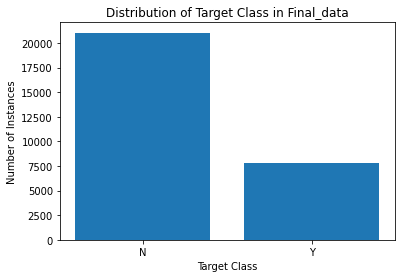

In [41]:
class_count = final_data['ReportedFraud'].value_counts()

# Plot the distribution of the target class
plt.bar(class_count.index, class_count.values)
plt.xlabel('Target Class')
plt.ylabel('Number of Instances')
plt.title('Distribution of Target Class in Final_data')
plt.show()

In [42]:
fraud_yes = final_data[final_data["ReportedFraud"]== 'Y']
fraud_no = final_data[final_data["ReportedFraud"]== 'N']

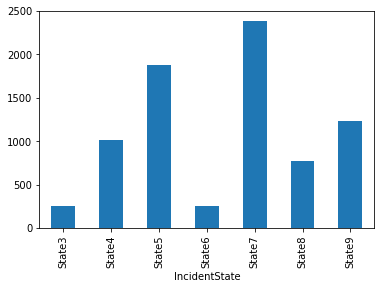

In [43]:
counts = fraud_yes.groupby('IncidentState')["ReportedFraud"].count()
counts.plot(kind='bar')
plt.show()

In [44]:
final_data.describe()

,IncidentTime,NumberOfVehicles,BodilyInjuries,Witnesses,AmountOfTotalClaim,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage,InsuredAge,InsuredZipCode,CapitalGains,CapitalLoss,InsurancePolicyNumber,CustomerLoyaltyPeriod,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit
count,28805.000000,28836.000000,28836.000000,28790.00000,28786.000000,28836.000000,28836.000000,28836.000000,28836.000000,28836.000000,28836.000000,28836.000000,28836.000000,28836.000000,28836.000000,28836.000000,2.883600e+04
mean,11.764069,1.823207,0.985782,1.48826,52308.545473,7337.118428,7283.870197,37687.129387,38.815370,502436.579068,23066.569566,-24940.612429,129312.517097,203.067867,1114.282529,1255.528382,9.836680e+05
std,6.148869,0.980099,0.784764,1.04079,25101.172550,4427.638593,4375.842738,17977.048232,7.996377,72250.868871,27637.813724,27913.209608,11114.060267,99.932951,546.632816,223.013899,1.969282e+06
min,0.000000,1.000000,0.000000,0.00000,150.000000,0.000000,0.000000,109.000000,19.000000,430104.000000,0.000000,-111100.000000,110122.000000,1.000000,500.000000,-1.000000,-1.000000e+06
25%,6.000000,1.000000,0.000000,1.00000,44643.750000,4743.750000,4862.000000,32193.250000,33.000000,448603.000000,0.000000,-50000.000000,119698.750000,126.000000,622.000000,1122.007500,0.000000e+00
50%,12.000000,1.000000,1.000000,1.00000,58360.000000,7147.000000,7051.000000,42457.500000,38.000000,466691.000000,0.000000,0.000000,129278.500000,199.000000,1000.000000,1265.205000,0.000000e+00
75%,17.000000,3.000000,2.000000,2.00000,68982.750000,10571.250000,10327.000000,49535.750000,44.000000,603848.000000,49000.000000,0.000000,138933.250000,267.000000,1627.000000,1396.605000,4.859610e+05
max,23.000000,4.000000,2.000000,3.00000,114920.000000,21450.000000,23670.000000,79560.000000,64.000000,620962.000000,100500.000000,0.000000,148619.000000,479.000000,2000.000000,2047.590000,1.000000e+07


In [45]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28836 entries, 0 to 28835
Data columns (total 42 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CustomerID                  28836 non-null  object 
 1   DateOfIncident              28836 non-null  object 
 2   TypeOfIncident              28836 non-null  object 
 3   TypeOfCollission            23674 non-null  object 
 4   SeverityOfIncident          28836 non-null  object 
 5   AuthoritiesContacted        28836 non-null  object 
 6   IncidentState               28836 non-null  object 
 7   IncidentCity                28836 non-null  object 
 8   IncidentAddress             28836 non-null  object 
 9   IncidentTime                28805 non-null  float64
 10  NumberOfVehicles            28836 non-null  int64  
 11  PropertyDamage              18377 non-null  object 
 12  BodilyInjuries              28836 non-null  int64  
 13  Witnesses                   287

In [46]:
final_data.isnull().sum()

CustomerID                        0
DateOfIncident                    0
TypeOfIncident                    0
TypeOfCollission               5162
SeverityOfIncident                0
AuthoritiesContacted              0
IncidentState                     0
IncidentCity                      0
IncidentAddress                   0
IncidentTime                     31
NumberOfVehicles                  0
PropertyDamage                10459
BodilyInjuries                    0
Witnesses                        46
PoliceReport                   9805
AmountOfTotalClaim               50
AmountOfInjuryClaim               0
AmountOfPropertyClaim             0
AmountOfVehicleDamage             0
InsuredAge                        0
InsuredZipCode                    0
InsuredGender                    30
InsuredEducationLevel             0
InsuredOccupation                 0
InsuredHobbies                    0
CapitalGains                      0
CapitalLoss                       0
Country                     

In [47]:
final_data.corr()

,IncidentTime,NumberOfVehicles,BodilyInjuries,Witnesses,AmountOfTotalClaim,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage,InsuredAge,InsuredZipCode,CapitalGains,CapitalLoss,InsurancePolicyNumber,CustomerLoyaltyPeriod,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit
IncidentTime,1.000000,0.175127,-0.043896,0.009016,0.273527,0.226669,0.218130,0.273072,0.114488,0.005966,-0.012530,-0.016764,-0.008730,0.094530,0.083047,-0.009724,-0.024683
NumberOfVehicles,0.175127,1.000000,0.019637,-0.015842,0.291369,0.254780,0.231888,0.287740,0.021664,0.015182,0.057967,-0.002662,-0.028060,0.015138,0.042381,-0.055476,-0.025024
BodilyInjuries,-0.043896,0.019637,1.000000,-0.025741,0.031001,0.031908,0.034103,0.026664,-0.027791,0.016280,0.055576,-0.029415,-0.023945,-0.021662,-0.031498,0.000452,0.039018
Witnesses,0.009016,-0.015842,-0.025741,1.000000,-0.009414,-0.024756,0.052233,-0.019425,0.059672,0.008520,-0.017106,-0.041328,-0.028928,0.066705,0.084758,0.007774,0.004886
AmountOfTotalClaim,0.273527,0.291369,0.031001,-0.009414,1.000000,0.831594,0.841957,0.986558,0.070825,-0.021489,0.012434,-0.013989,-0.103587,0.065398,0.027231,-0.004967,-0.038132
AmountOfInjuryClaim,0.226669,0.254780,0.031908,-0.024756,0.831594,1.000000,0.622868,0.763172,0.083090,-0.014888,0.009078,-0.028032,-0.055687,0.073378,0.038940,-0.017979,-0.047432
AmountOfPropertyClaim,0.218130,0.231888,0.034103,0.052233,0.841957,0.622868,1.000000,0.778821,0.075157,-0.002477,0.003841,-0.018501,-0.093827,0.055100,0.071897,-0.016531,-0.016722
AmountOfVehicleDamage,0.273072,0.287740,0.026664,-0.019425,0.986558,0.763172,0.778821,1.000000,0.060257,-0.025969,0.014067,-0.008068,-0.108726,0.060027,0.011136,0.002181,-0.037245
InsuredAge,0.114488,0.021664,-0.027791,0.059672,0.070825,0.083090,0.075157,0.060257,1.000000,0.042072,-0.010798,0.017760,0.000055,0.933219,0.050991,0.035145,-0.002061
InsuredZipCode,0.005966,0.015182,0.016280,0.008520,-0.021489,-0.014888,-0.002477,-0.025969,0.042072,1.000000,-0.013577,0.029327,-0.012991,0.040450,0.005297,0.025100,0.027233


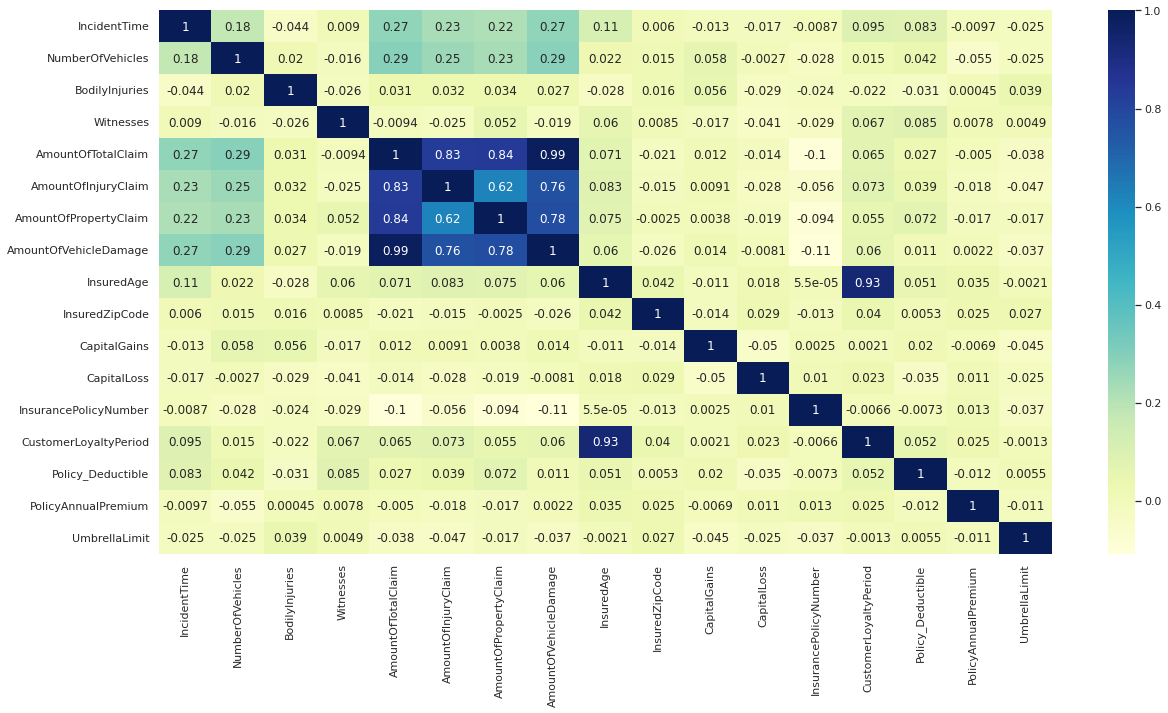

In [48]:
# features correlation with  visualization using seaborn
sns.set(rc={'figure.figsize': (20, 10)})
sns .heatmap(final_data.corr(),annot=True,annot_kws={'size':12},cmap="YlGnBu")
plt.show()

In [49]:
#droping highly corelated columns
final_data=final_data.drop(['InsuredAge','AmountOfVehicleDamage'],axis=1)

In [50]:
final_data.head()

,CustomerID,DateOfIncident,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentCity,IncidentAddress,IncidentTime,...,Policy_CombinedSingleLimit,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,InsuredRelationship,vehicle_Make,vehicle_YOM,vehicle_Model,vehicle_id,ReportedFraud
0,Cust10000,2015-02-03,Multi-vehicle Collision,Side Collision,Total Loss,Police,State7,City1,Location 1311,17.0,...,100/300,1000,1632.73,0,not-in-family,Audi,2008,A5,Vehicle26917,N
1,Cust10001,2015-02-02,Multi-vehicle Collision,Side Collision,Total Loss,Police,State7,City5,Location 1311,10.0,...,100/300,1000,1255.19,0,not-in-family,Audi,2006,A5,Vehicle15893,N
2,Cust10002,2015-01-15,Single Vehicle Collision,Side Collision,Minor Damage,Other,State8,City6,Location 2081,22.0,...,500/1000,617,1373.38,0,wife,Volkswagen,1999,Jetta,Vehicle5152,N
3,Cust10003,2015-01-19,Single Vehicle Collision,Side Collision,Minor Damage,Other,State9,City6,Location 2081,22.0,...,500/1000,722,1337.60,0,own-child,Volkswagen,2003,Jetta,Vehicle37363,N
4,Cust10004,2015-01-09,Single Vehicle Collision,Rear Collision,Minor Damage,Fire,State8,City6,Location 1695,10.0,...,100/300,500,1353.73,4279863,unmarried,Toyota,2010,CRV,Vehicle28633,N


In [51]:
final_data.shape

(28836, 40)

In [52]:
final_data.nunique()      

CustomerID                    28836
DateOfIncident                   72
TypeOfIncident                    4
TypeOfCollission                  3
SeverityOfIncident                4
AuthoritiesContacted              5
IncidentState                     7
IncidentCity                      7
IncidentAddress                1000
IncidentTime                     24
NumberOfVehicles                  4
PropertyDamage                    2
BodilyInjuries                    3
Witnesses                         4
PoliceReport                      2
AmountOfTotalClaim            21975
AmountOfInjuryClaim           11958
AmountOfPropertyClaim         11785
InsuredZipCode                  995
InsuredGender                     2
InsuredEducationLevel             7
InsuredOccupation                14
InsuredHobbies                   20
CapitalGains                    338
CapitalLoss                     354
Country                           1
InsurancePolicyNumber         28836
CustomerLoyaltyPeriod       

In [53]:
final_data= final_data.drop(['CustomerID', 'DateOfIncident', 'IncidentAddress'
                                     ,'InsurancePolicyNumber', 'DateOfPolicyCoverage', 'Policy_CombinedSingleLimit'
                                     , 'vehicle_id', 'Country','IncidentState','IncidentCity' ],axis=1)

In [54]:
#to get only numerical cols 
num=final_data._get_numeric_data() 
num.head()

,IncidentTime,NumberOfVehicles,BodilyInjuries,Witnesses,AmountOfTotalClaim,AmountOfInjuryClaim,AmountOfPropertyClaim,InsuredZipCode,CapitalGains,CapitalLoss,CustomerLoyaltyPeriod,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit
0,17.0,3,1,0.0,65501.0,13417,6071,454776,56700,-48500,49,1000,1632.73,0
1,10.0,3,2,1.0,61382.0,15560,5919,454776,70600,-48500,114,1000,1255.19,0
2,22.0,1,2,3.0,66755.0,11630,11630,603260,66400,-63700,167,617,1373.38,0
3,22.0,1,2,3.0,66243.0,12003,12003,474848,47900,-73400,190,722,1337.60,0
4,10.0,1,2,1.0,53544.0,8829,7234,457942,0,-41500,115,500,1353.73,4279863


In [55]:
#to get only cat cols and changing it as categorical from object 
cat=final_data.drop(num,axis=1)
cat=cat.astype('category')
cat.head()

,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,PropertyDamage,PoliceReport,InsuredGender,InsuredEducationLevel,InsuredOccupation,InsuredHobbies,InsurancePolicyState,InsuredRelationship,vehicle_Make,vehicle_YOM,vehicle_Model,ReportedFraud
0,Multi-vehicle Collision,Side Collision,Total Loss,Police,NaN,NaN,MALE,JD,armed-forces,movies,State1,not-in-family,Audi,2008,A5,N
1,Multi-vehicle Collision,Side Collision,Total Loss,Police,YES,YES,MALE,JD,tech-support,cross-fit,State1,not-in-family,Audi,2006,A5,N
2,Single Vehicle Collision,Side Collision,Minor Damage,Other,YES,NO,MALE,JD,armed-forces,polo,State3,wife,Volkswagen,1999,Jetta,N
3,Single Vehicle Collision,Side Collision,Minor Damage,Other,YES,NO,MALE,JD,armed-forces,polo,State2,own-child,Volkswagen,2003,Jetta,N
4,Single Vehicle Collision,Rear Collision,Minor Damage,Fire,NO,YES,FEMALE,High School,exec-managerial,dancing,State2,unmarried,Toyota,2010,CRV,N


In [56]:
num.isnull().sum()

IncidentTime             31
NumberOfVehicles          0
BodilyInjuries            0
Witnesses                46
AmountOfTotalClaim       50
AmountOfInjuryClaim       0
AmountOfPropertyClaim     0
InsuredZipCode            0
CapitalGains              0
CapitalLoss               0
CustomerLoyaltyPeriod     0
Policy_Deductible         0
PolicyAnnualPremium       0
UmbrellaLimit             0
dtype: int64

In [57]:
num.fillna(num.mean(), inplace=True)

In [58]:
num.isnull().sum()

IncidentTime             0
NumberOfVehicles         0
BodilyInjuries           0
Witnesses                0
AmountOfTotalClaim       0
AmountOfInjuryClaim      0
AmountOfPropertyClaim    0
InsuredZipCode           0
CapitalGains             0
CapitalLoss              0
CustomerLoyaltyPeriod    0
Policy_Deductible        0
PolicyAnnualPremium      0
UmbrellaLimit            0
dtype: int64

In [59]:
cat1=cat.drop(['ReportedFraud'],axis=1)

In [60]:
t=cat.drop(cat1,axis=1)

In [61]:
t.head()

,ReportedFraud
0,N
1,N
2,N
3,N
4,N


In [62]:
cat1.head()

,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,PropertyDamage,PoliceReport,InsuredGender,InsuredEducationLevel,InsuredOccupation,InsuredHobbies,InsurancePolicyState,InsuredRelationship,vehicle_Make,vehicle_YOM,vehicle_Model
0,Multi-vehicle Collision,Side Collision,Total Loss,Police,NaN,NaN,MALE,JD,armed-forces,movies,State1,not-in-family,Audi,2008,A5
1,Multi-vehicle Collision,Side Collision,Total Loss,Police,YES,YES,MALE,JD,tech-support,cross-fit,State1,not-in-family,Audi,2006,A5
2,Single Vehicle Collision,Side Collision,Minor Damage,Other,YES,NO,MALE,JD,armed-forces,polo,State3,wife,Volkswagen,1999,Jetta
3,Single Vehicle Collision,Side Collision,Minor Damage,Other,YES,NO,MALE,JD,armed-forces,polo,State2,own-child,Volkswagen,2003,Jetta
4,Single Vehicle Collision,Rear Collision,Minor Damage,Fire,NO,YES,FEMALE,High School,exec-managerial,dancing,State2,unmarried,Toyota,2010,CRV


In [63]:
cat1['PropertyDamage'] = cat1['PropertyDamage'].replace('?', 'NaN')
cat1['PoliceReport'] = cat1['PoliceReport'].replace('?', 'NaN')

In [64]:
cat1.PropertyDamage.value_counts()

NO     9687
YES    8690
Name: PropertyDamage, dtype: int64

In [65]:
cat1.PoliceReport.value_counts()

NO     9898
YES    9133
Name: PoliceReport, dtype: int64

In [66]:
cat1.head()

,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,PropertyDamage,PoliceReport,InsuredGender,InsuredEducationLevel,InsuredOccupation,InsuredHobbies,InsurancePolicyState,InsuredRelationship,vehicle_Make,vehicle_YOM,vehicle_Model
0,Multi-vehicle Collision,Side Collision,Total Loss,Police,NaN,NaN,MALE,JD,armed-forces,movies,State1,not-in-family,Audi,2008,A5
1,Multi-vehicle Collision,Side Collision,Total Loss,Police,YES,YES,MALE,JD,tech-support,cross-fit,State1,not-in-family,Audi,2006,A5
2,Single Vehicle Collision,Side Collision,Minor Damage,Other,YES,NO,MALE,JD,armed-forces,polo,State3,wife,Volkswagen,1999,Jetta
3,Single Vehicle Collision,Side Collision,Minor Damage,Other,YES,NO,MALE,JD,armed-forces,polo,State2,own-child,Volkswagen,2003,Jetta
4,Single Vehicle Collision,Rear Collision,Minor Damage,Fire,NO,YES,FEMALE,High School,exec-managerial,dancing,State2,unmarried,Toyota,2010,CRV


In [67]:
cat1.isnull().sum()

TypeOfIncident               0
TypeOfCollission          5162
SeverityOfIncident           0
AuthoritiesContacted         0
PropertyDamage           10459
PoliceReport              9805
InsuredGender               30
InsuredEducationLevel        0
InsuredOccupation            0
InsuredHobbies               0
InsurancePolicyState         0
InsuredRelationship          0
vehicle_Make                 0
vehicle_YOM                  0
vehicle_Model                0
dtype: int64

In [68]:
cat1.InsuredGender.value_counts()

FEMALE    15644
MALE      13162
Name: InsuredGender, dtype: int64

In [69]:
cat1 = cat1.replace('NaN', np.nan)

In [70]:
cat1.head()

,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,PropertyDamage,PoliceReport,InsuredGender,InsuredEducationLevel,InsuredOccupation,InsuredHobbies,InsurancePolicyState,InsuredRelationship,vehicle_Make,vehicle_YOM,vehicle_Model
0,Multi-vehicle Collision,Side Collision,Total Loss,Police,NaN,NaN,MALE,JD,armed-forces,movies,State1,not-in-family,Audi,2008,A5
1,Multi-vehicle Collision,Side Collision,Total Loss,Police,YES,YES,MALE,JD,tech-support,cross-fit,State1,not-in-family,Audi,2006,A5
2,Single Vehicle Collision,Side Collision,Minor Damage,Other,YES,NO,MALE,JD,armed-forces,polo,State3,wife,Volkswagen,1999,Jetta
3,Single Vehicle Collision,Side Collision,Minor Damage,Other,YES,NO,MALE,JD,armed-forces,polo,State2,own-child,Volkswagen,2003,Jetta
4,Single Vehicle Collision,Rear Collision,Minor Damage,Fire,NO,YES,FEMALE,High School,exec-managerial,dancing,State2,unmarried,Toyota,2010,CRV


In [71]:
cat1.isnull().sum()

TypeOfIncident               0
TypeOfCollission          5162
SeverityOfIncident           0
AuthoritiesContacted         0
PropertyDamage           10459
PoliceReport              9805
InsuredGender               30
InsuredEducationLevel        0
InsuredOccupation            0
InsuredHobbies               0
InsurancePolicyState         0
InsuredRelationship          0
vehicle_Make                 0
vehicle_YOM                  0
vehicle_Model                0
dtype: int64

In [72]:
cat1['PropertyDamage'] = cat1['PropertyDamage'].fillna(cat1['PropertyDamage'].mode()[0])
cat1['PoliceReport'] = cat1['PoliceReport'].fillna(cat1['PoliceReport'].mode()[0])
cat1['InsuredGender'] = cat1['InsuredGender'].fillna(cat1['InsuredGender'].mode()[0])
cat1['TypeOfCollission'] = cat1['TypeOfCollission'].fillna(cat1['TypeOfCollission'].mode()[0])

In [73]:
cat1.isnull().sum()

TypeOfIncident           0
TypeOfCollission         0
SeverityOfIncident       0
AuthoritiesContacted     0
PropertyDamage           0
PoliceReport             0
InsuredGender            0
InsuredEducationLevel    0
InsuredOccupation        0
InsuredHobbies           0
InsurancePolicyState     0
InsuredRelationship      0
vehicle_Make             0
vehicle_YOM              0
vehicle_Model            0
dtype: int64

In [74]:
cat_cols=cat1.columns
cat_cols

Index(['TypeOfIncident', 'TypeOfCollission', 'SeverityOfIncident',
       'AuthoritiesContacted', 'PropertyDamage', 'PoliceReport',
       'InsuredGender', 'InsuredEducationLevel', 'InsuredOccupation',
       'InsuredHobbies', 'InsurancePolicyState', 'InsuredRelationship',
       'vehicle_Make', 'vehicle_YOM', 'vehicle_Model'],
      dtype='object')

In [75]:
from sklearn.preprocessing import LabelEncoder

In [76]:
le = LabelEncoder()

In [77]:
for col in cat_cols:
    cat1[col] = le.fit_transform(cat1[col])

In [78]:
cat1.head()

,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,PropertyDamage,PoliceReport,InsuredGender,InsuredEducationLevel,InsuredOccupation,InsuredHobbies,InsurancePolicyState,InsuredRelationship,vehicle_Make,vehicle_YOM,vehicle_Model
0,0,2,2,4,0,0,1,3,1,12,0,1,2,13,5
1,0,2,2,4,1,1,1,3,12,6,0,1,2,11,5
2,2,2,1,3,1,0,1,3,1,14,2,5,14,4,20
3,2,2,1,3,1,0,1,3,1,14,1,3,14,8,20
4,2,1,1,1,0,1,0,2,3,7,1,4,13,15,8


In [79]:
final_df=cat1.join(num)

In [80]:
final_df.head()

,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,PropertyDamage,PoliceReport,InsuredGender,InsuredEducationLevel,InsuredOccupation,InsuredHobbies,...,AmountOfTotalClaim,AmountOfInjuryClaim,AmountOfPropertyClaim,InsuredZipCode,CapitalGains,CapitalLoss,CustomerLoyaltyPeriod,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit
0,0,2,2,4,0,0,1,3,1,12,...,65501.0,13417,6071,454776,56700,-48500,49,1000,1632.73,0
1,0,2,2,4,1,1,1,3,12,6,...,61382.0,15560,5919,454776,70600,-48500,114,1000,1255.19,0
2,2,2,1,3,1,0,1,3,1,14,...,66755.0,11630,11630,603260,66400,-63700,167,617,1373.38,0
3,2,2,1,3,1,0,1,3,1,14,...,66243.0,12003,12003,474848,47900,-73400,190,722,1337.60,0
4,2,1,1,1,0,1,0,2,3,7,...,53544.0,8829,7234,457942,0,-41500,115,500,1353.73,4279863


In [81]:
final_df.shape

(28836, 29)

In [82]:
final_df.dtypes

TypeOfIncident             int64
TypeOfCollission           int64
SeverityOfIncident         int64
AuthoritiesContacted       int64
PropertyDamage             int64
PoliceReport               int64
InsuredGender              int64
InsuredEducationLevel      int64
InsuredOccupation          int64
InsuredHobbies             int64
InsurancePolicyState       int64
InsuredRelationship        int64
vehicle_Make               int64
vehicle_YOM                int64
vehicle_Model              int64
IncidentTime             float64
NumberOfVehicles           int64
BodilyInjuries             int64
Witnesses                float64
AmountOfTotalClaim       float64
AmountOfInjuryClaim        int64
AmountOfPropertyClaim      int64
InsuredZipCode             int64
CapitalGains               int64
CapitalLoss                int64
CustomerLoyaltyPeriod      int64
Policy_Deductible          int64
PolicyAnnualPremium      float64
UmbrellaLimit              int64
dtype: object

In [83]:
t.head()

,ReportedFraud
0,N
1,N
2,N
3,N
4,N


In [84]:
le1=LabelEncoder()

In [85]:
t1 = le.fit_transform(t)

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [86]:
tag=pd.DataFrame(t1,columns=['ReportedFraud'])
tag.head()

,ReportedFraud
0,0
1,0
2,0
3,0
4,0


In [87]:
from sklearn.preprocessing import StandardScaler

In [88]:
final_col=final_df.columns

In [89]:
scaler = StandardScaler()
final_df[final_col] = scaler.fit_transform(final_df[final_col])

In [90]:
final_df.head()

,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,PropertyDamage,PoliceReport,InsuredGender,InsuredEducationLevel,InsuredOccupation,InsuredHobbies,...,AmountOfTotalClaim,AmountOfInjuryClaim,AmountOfPropertyClaim,InsuredZipCode,CapitalGains,CapitalLoss,CustomerLoyaltyPeriod,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit
0,-1.091458,1.352164,0.864345,1.209498,-0.656773,-0.680833,1.091262,0.013799,-1.395062,0.423082,...,0.526037,1.373190,-0.277179,-0.659665,1.216956,-0.844038,-1.541739,-0.209070,1.691411,-0.499515
1,-1.091458,1.352164,0.864345,1.209498,1.522595,1.468789,1.091262,0.013799,1.338782,-0.631155,...,0.361795,1.857203,-0.311916,-0.659665,1.719899,-0.844038,-0.891292,-0.209070,-0.001517,-0.499515
2,0.764442,1.352164,-0.210208,0.556809,1.522595,-0.680833,1.091262,0.013799,-1.395062,0.774494,...,0.576039,0.969581,0.993227,1.395487,1.567931,-1.388592,-0.360927,-0.909735,0.528459,-0.499515
3,0.764442,1.352164,-0.210208,0.556809,1.522595,-0.680833,1.091262,0.013799,-1.395062,0.774494,...,0.555623,1.053826,1.078469,-0.381851,0.898547,-1.736104,-0.130769,-0.717647,0.368018,-0.499515
4,0.764442,-0.029761,-0.210208,-0.748569,-0.656773,1.468789,-0.916370,-0.502290,-0.898000,-0.455449,...,0.049263,0.336953,-0.011397,-0.615845,-0.834616,-0.593256,-0.881285,-1.123777,0.440346,1.673834


In [94]:
#final_df=final_df.join(tag)
#final_df.head(100)

In [95]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss


In [96]:
smk=SMOTETomek(random_state=42)

In [97]:
data,target=smk.fit_resample(final_df,tag)

In [99]:
print(data.shape)
print(target.shape)

(41812, 30)
(41812, 1)
